# Capstone Project
### This notebook will be mainly used for the capstone project.

In [21]:
import pandas as pd
import numpy as np
import types
from botocore.client import Config
import ibm_boto3
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [43]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [44]:
#Dataset with necessary columns
df = df[['SEVERITYCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


In [45]:
#Drop rows with NaN
df.dropna(axis=0, how='any', inplace=True)

#Label encoding
df['WEATHER'] = df['WEATHER'].astype('category')
df['WEATHER_CAT'] = df['WEATHER'].cat.codes
df['ROADCOND'] = df['ROADCOND'].astype('category')
df['ROADCOND_CAT'] = df['ROADCOND'].cat.codes
df['LIGHTCOND'] = df['LIGHTCOND'].astype('category')
df['LIGHTCOND_CAT'] = df['LIGHTCOND'].cat.codes

df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
0,2,Overcast,Wet,Daylight,4,8,5
1,1,Raining,Wet,Dark - Street Lights On,6,8,2
2,1,Overcast,Dry,Daylight,4,0,5
3,1,Clear,Dry,Daylight,1,0,5
4,2,Raining,Wet,Daylight,6,8,5


In [46]:
df['SEVERITYCODE'].value_counts()

1    132285
2     57052
Name: SEVERITYCODE, dtype: int64

In [7]:
#Balancing data by undersampling
count_1, count_2 = df['SEVERITYCODE'].value_counts()

df_1 = df[df['SEVERITYCODE'] == 1]
df_2 = df[df['SEVERITYCODE'] == 2]

df_1 = df_1.sample(count_2)
df = pd.concat([df_1, df_2], axis=0)

print(df['SEVERITYCODE'].value_counts())

2    57052
1    57052
Name: SEVERITYCODE, dtype: int64


## Machine Learning

In [8]:
X = np.asarray(df[['WEATHER_CAT', 'ROADCOND_CAT', 'LIGHTCOND_CAT']])
X[0:5]

array([[ 1,  0,  5],
       [ 4,  0,  5],
       [10,  7,  8],
       [10,  7,  8],
       [ 1,  0,  5]], dtype=int8)

In [9]:
Y = np.asarray(df['SEVERITYCODE'])
Y[0:5]

array([1, 1, 1, 1, 1])

In [10]:
#Normalizing the data set
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.71839387, -0.69207252,  0.39355198],
       [ 0.3893057 , -0.69207252,  0.39355198],
       [ 2.60470484,  1.2314153 ,  2.21916641],
       [ 2.60470484,  1.2314153 ,  2.21916641],
       [-0.71839387, -0.69207252,  0.39355198]])

In [11]:
#Split dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (91283, 3) (91283,)
Test set: (22821, 3) (22821,)


### K-Nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Test accuracy for different Ks
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    K_yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, K_yhat)

    
    std_acc[n-1]=np.std(K_yhat==Y_test)/np.sqrt(K_yhat.shape[0])

mean_acc

array([0.55028263, 0.51982823, 0.550195  , 0.55606678, 0.55694317,
       0.55593532, 0.5533938 , 0.55229832, 0.5526927 , 0.55374436,
       0.55365672, 0.54375356, 0.54427939, 0.54432321, 0.54471758,
       0.54467377, 0.54458613, 0.54515578, 0.54493668, 0.5449805 ,
       0.54489286, 0.54866132, 0.5472591 , 0.54857368, 0.54940625,
       0.54866132, 0.54936243, 0.5497568 , 0.54848604])

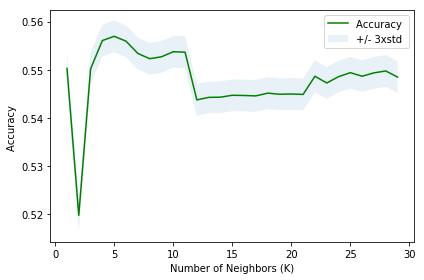

The best accuracy was with 0.5569431663818413 with k= 5


In [22]:
#Plot accuracy for different Ks
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [23]:
#Train Model and Predict  
k=5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
neigh
K_yhat = neigh.predict(X_test)
K_yhat[0:5]
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, K_yhat))

Train set Accuracy:  0.5546706396590821
Test set Accuracy:  0.5569431663818413


### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

#Model
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
tree.fit(X_train, Y_train)
tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
#Predict
predTree = tree.predict(X_test)
print("Decision Trees's Accuracy: ", metrics.accuracy_score(Y_test, predTree))

Decision Trees's Accuracy:  0.5644800841330354


### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#Model
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, Y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
#Predict
LR_yhat = LR.predict(X_test)
print(LR_yhat)
LR_yhat_prob = LR.predict_proba(X_test)
print(LR_yhat_prob)

[2 2 2 ... 1 2 2]
[[0.42006555 0.57993445]
 [0.47144914 0.52855086]
 [0.43279412 0.56720588]
 ...
 [0.51131139 0.48868861]
 [0.47144914 0.52855086]
 [0.43279412 0.56720588]]


## Evaluation

In [39]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

### K-Nearest Neighbors

In [37]:
print("Jaccard Similarity Score: ", jaccard_similarity_score(Y_test, K_yhat))
print("F1 Score: ", f1_score(Y_test, K_yhat, average='macro'))

Jaccard Similarity Score:  0.5569431663818413
F1 Score:  0.5415476992234572


### Decision Tree

In [38]:
print("Jaccard Similarity Score: ", jaccard_similarity_score(Y_test, predTree))
print("F1 Score: ", f1_score(Y_test, predTree, average='macro'))

Jaccard Similarity Score:  0.5644800841330354
F1 Score:  0.5402991307607529


### Logistic Regression

In [40]:
print("Jaccard Similarity Score: ", jaccard_similarity_score(Y_test, LR_yhat))
print("F1 Score: ", f1_score(Y_test, LR_yhat, average='macro'))
print("Log Loss: ", log_loss(Y_test, LR_yhat_prob))

Jaccard Similarity Score:  0.5351211603347794
F1 Score:  0.5222485014149295
Log Loss:  0.681252171206575
